In [645]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns 

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load data

* using skipinitialspace to remove extra space
* using na_value to see ? as NA

In [646]:
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, na_values="?")
df  = pd.read_csv("../input/adult-census-income/adult.csv", skipinitialspace=True, na_values="?")
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

## Data cleaning

This section is to removed records with missing values.

In [647]:
#filter data to remove records with missing value, for the convenience, make a deep copy and use dropna 
cleaned_df = df.copy('true').dropna(axis=0)

In [648]:
cleaned_df['over_50K'] = np.where(filtered_df.income == '<=50K', 0, 1)
cleaned_df['sex_num'] = np.where(filtered_df.sex == 'Female', 0, 1)

cleaned_df['workclass_num'] = cleaned_df.workclass.map({'Self-emp-not-inc' : 0, 'Private':1, 'State-gov':2, 
                                                          'Without-pay':3, 'Local-gov':4, 'Self-emp-inc':5, 'Federal-gov':6, 'Never-worked':7}).astype(int)


cleaned_df['marital_status_num'] = cleaned_df['marital_status'].map({'Never-married' : 0, 'Widowed' : 1, 'Separated' : 2, 
                                                                       'Married-spouse-absent' : 3, 'Married-civ-spouse' : 4, 'Divorced' : 5, 'Married-AF-spouse' : 6}).astype(int)

cleaned_df['occupation_num'] = cleaned_df['occupation'].map({'Farming-fishing' : 0, 'Other-service' : 1, 'Transport-moving' : 2, 'Protective-serv' : 3, 'Exec-managerial' : 4, 'Armed-Forces' : 5, 
 'Machine-op-inspct' : 6, 'Prof-specialty' : 7, 'Tech-support' : 8, 'Handlers-cleaners' : 9, 'Priv-house-serv' : 10, 'Adm-clerical' : 11, 'Craft-repair' : 12, 'Sales' : 13}).astype(int)

cleaned_df['relationship_num'] = cleaned_df['relationship'].map({'Wife' : 0, 'Unmarried' : 1, 'Own-child' : 2, 'Husband' : 3, 'Other-relative' : 4, 'Not-in-family' : 5}).astype(int)
cleaned_df['race_num'] = cleaned_df['race'].map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})

cleaned_df.drop(columns=['fnlwgt', 'education', 'workclass', 'income', 'marital_status', 'occupation', 'sex', 'relationship', 'native_country', 'race'])

,age,education_num,capital_gain,capital_loss,hours_per_week,over_50K,sex_num,workclass_num,marital_status_num,occupation_num,relationship_num,race_num
1,82,9,0,4356,18,0,0,1,1,4,5,0
3,54,4,0,3900,40,0,0,1,5,6,1,0
4,41,10,0,3900,40,0,0,1,2,7,2,0
5,34,9,0,3770,45,0,0,1,5,1,1,0
6,38,6,0,3770,40,0,1,1,2,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,0,1,1,0,3,5,0
32557,27,12,0,0,38,0,0,1,4,8,0,0
32558,40,9,0,0,40,1,1,1,4,6,3,0
32559,58,9,0,0,40,0,0,1,1,11,1,0


## Support Vector Machine


### Split data and pick features 

In [649]:
from sklearn.model_selection import train_test_split

# Pick discussed features
X = cleaned_df[['education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'sex_num', 'workclass_num', 'marital_status_num', 'occupation_num', 'relationship_num', 'race_num']]

# Pick the labels (Income)
Y = cleaned_df['over_50K']

# Spliting into 80% for training set and 20% for testing set
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


### Use SVM
Based on tutorial from page https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

### Use kernelized SVM 

 using grid search to find the optimal hyperparameters.

In [650]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

notFoundBestGridParams = 0;
best_params = {}

if notFoundBestGridParams == 1:
    C_range = [0.1, 1, 10, 100]
    gamma_vals = [0.001, 0.0001, 'scale']
    param_grid = dict(gamma=gamma_vals, C=C_range)

    grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=10)
    grid.fit(X, Y.values.ravel())
    
    best_params = grid.best_params_;
    print("The best parameters are %s" % (grid.best_params_, grid.best_score_))

# we found that C = 100 and grammar = 'scale' is the best

svmModel = SVC(kernel='rbf', C = 10, gamma = 'scale')
svmModel.fit(X_train, Y_train)

print(classification_report(y_test, svmModel.predict(x_test), target_names=['Income more than 50K', 'Income less than 50K']))

SVC(C=10)

                      precision    recall  f1-score   support

Income more than 50K       0.80      0.99      0.89      4529
Income less than 50K       0.88      0.27      0.41      1504

            accuracy                           0.81      6033
           macro avg       0.84      0.63      0.65      6033
        weighted avg       0.82      0.81      0.77      6033



### Learning curve

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Learning curve')

Text(0.5, 0, 'Training data')

Text(0, 0.5, 'Score')

Done drawing learning curve


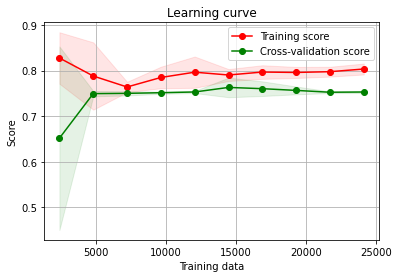

In [651]:
# Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

train_size=np.linspace(0.1, 1, 10)

plt.figure()
plt.title("Learning curve")
plt.xlabel("Training data")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(svmModel, X, Y, train_sizes=train_size)
train_scores_mean = np.mean(train_scores, axis=1)

train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)
plt.grid()
    
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
plt.legend(loc="best")

print('Learning curve for this SVM model')

## Validation curve

In [653]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(0.1, 1, 10)
param_name="C"
ylim=[0.78, 0.90]
    
train_scores, test_scores = validation_curve(svmModel, X, Y, param_name="C", param_range=param_range, scoring="accuracy")

NameError: name 'train_mean' is not defined

Text(0.5, 0, 'Regularization parameter C')

Text(0, 0.5, 'Accuracy')

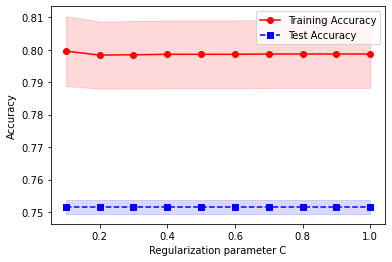

Validation curve for this SVM model


In [654]:
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(param_range, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(param_range,train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(param_range, test_mean, color='blue', linestyle='--', marker='s', label='Test Accuracy')
plt.fill_between(param_range,test_mean + test_std, test_mean - test_std, alpha=0.15, color='blue')

plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
